In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import isclose

[ 0. -3.  0.  3. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


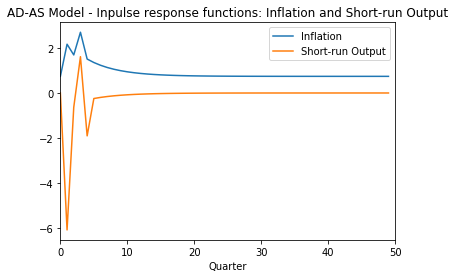

In [8]:
t = 50 # Each period is a quarter.
a = np.zeros(t) 
b = np.ones(t)/2
m = np.ones(t)
v = np.ones(t)/2
pi_bar = np.ones(t)*0.74 # Quarterly Inflation rate target - equivalent to 3% per year.
o = np.zeros(t)


# Preallocate loop variables

pi = np.zeros(t)
sr_y = np.zeros(t)

# Initial, steady state values for inflation and short run output

pi[0] = (pi_bar[0] + o[0] + (v[0]*b[0]*m[0])*pi_bar[0] + a[0]*v[0])/(1 + v[0]*b[0]*m[0])
sr_y[0] = a[0] -(b[0]*m[0])/(1 + v[0]*b[0]*m[0])*(pi[0] - pi_bar[0] + o[0] + a[0]*v[0])



# Sample: One period shock in period 1; increase in government expenditures of 10% of GDP.
a_i = np.array([-8, -4, -2, -1, 0])
a_g = np.array([10, 8, 8, 0, 0])
a_c = np.array([-5, -4, -3, -1, 0])
a[1:6] = a_i + a_g + a_c

o[1:2] = 4
pi_bar[1:2] = 0.03 # almost to the zero
m[1:3] = 2

for i in range(1,t):
    
    pi[i] = (pi[i-1] + o[i] + (v[i]*b[i]*m[i])*pi_bar[i] + a[i]*v[i])/(1 + v[i]*b[i]*m[i])
    sr_y[i] = a[i] -(b[i]*m[i])/(1 + v[i]*b[i]*m[i])*(pi[i] - pi_bar[i] + o[i] + a[i]*v[i])
    
print(a)   
## Impulse response function for inflation and short run output.

time = np.linspace(0,t-1,t)

plt.plot(time, pi , label = 'Inflation')
plt.plot(time, sr_y, label = 'Short-run Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Inpulse response functions: Inflation and Short-run Output')
plt.xlim(0, time.size) 
plt.legend()
plt.show()
plt.show()

[ 0. -3.  0.  3. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[100.         100.4        100.8016     101.2048064  101.60961205
 102.01605049  96.20793669  95.98131355  97.91527303  96.43865849
  96.58674712  96.78266934  97.0171512   97.28280487  97.57373599
  97.88523592  98.21353961  98.55563428  98.90910779  99.27202808
  99.64284725 100.02032498 100.40346743 100.7914783  101.18371977
 101.57968108 101.97895348 102.38121008 102.78618969 103.19368388
 103.60352658 104.01558575 104.42975664 104.84595649 105.26412012
 105.68419656 106.10614618 106.52993852 106.95555046 107.38296478
 107.81216904 108.24315458 108.67591585 109.11044976 109.54675521
 109.98483272 110.42468409 110.86631218 111.30972068 111.75491399
 112.20189703 112.65067522 113.1012543  113.55364035 114.00783967]
why the potential output got lower ? 


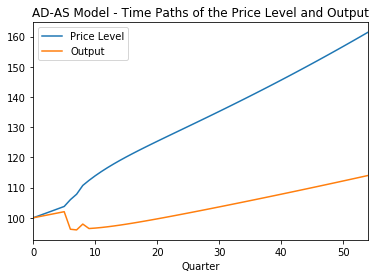

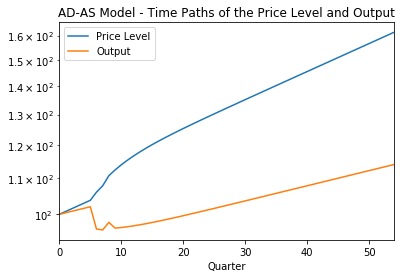

In [9]:
n = 5   # number of periods preceeding the shock
y_growth_rate = 0.004 #Output growth rate, quarterly 
p_bar_before = 0.0074 #Economy inflation rate, quarterly
p = np.zeros(t+n)
y = np.zeros(t+n)

# Initial values for the series

y[0] = 100
p[0] = 100

# The economy before the shock

for i in range(1,n):
    y[i]=y[i-1]*(1+y_growth_rate)
    p[i] = p[i-1]*(1 + p_bar_before)

    
# The economy after the shock.

for i in range(n-1,t+n):
    y[i] = y[i-1]*(1 + y_growth_rate + sr_y[i-n]/100)
    p[i] = p[i-1]*(1 + pi[i-n]/100)
    

    
## The path of output and prices over time 
print(a)
print(y)
print("why the potential output got lower ? ") 
time2 = np.linspace(0,t+n-1,t+n)

plt.plot(time2, p , label = 'Price Level')
plt.plot(time2, y, label = 'Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Time Paths of the Price Level and Output')
plt.xlim(0, time2.size-1) 
plt.legend()
plt.show()


plt.plot(time2, p , label = 'Price Level')
plt.plot(time2, y, label = 'Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Time Paths of the Price Level and Output')
plt.xlim(0, time2.size-1) 
plt.legend()
plt.yscale('log')
plt.show()